In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## Data collection and Data Analysis

In [2]:
#data collection
survived=pd.read_csv("titanic.csv")

In [3]:
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
survived.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
survived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
survived.shape

(891, 12)

In [7]:
survived.drop('Cabin',inplace=True,axis=1)

In [8]:
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
survived['Age'].fillna(survived['Age'].mean(),inplace=True)

In [10]:
survived.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
survived['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
survived['Embarked'].fillna('S',inplace=True)

In [13]:
survived.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Now No missing value is present in Dataset of titanic

In [14]:
survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

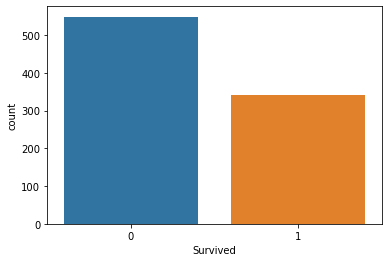

In [15]:
# Data Analysis
sns.countplot(x='Survived',data=survived)

<AxesSubplot:xlabel='Survived', ylabel='count'>

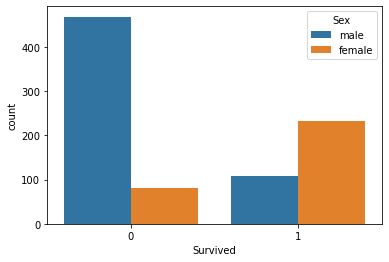

In [16]:
# Data Analysis
sns.countplot(x='Survived',data=survived,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

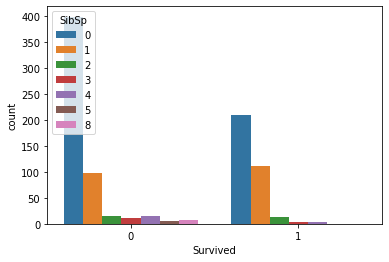

In [17]:
# Data Analysis
sns.countplot(x='Survived',data=survived,hue='SibSp')

<AxesSubplot:xlabel='Survived', ylabel='count'>

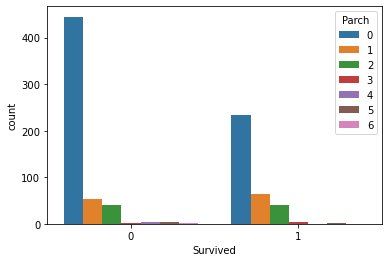

In [18]:
# Data Analysis
sns.countplot(x='Survived',data=survived,hue='Parch')

In [19]:
survived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
# convert categorical columns (Sex) to numeric
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
survived['Sex']=enc.fit_transform(survived['Sex'])
survived['Embarked']=enc.fit_transform(survived['Embarked'])


In [21]:
survived['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [22]:
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [23]:
survived.drop(columns='Ticket',inplace=True) #drop column ticket

In [24]:
survived['Family']=survived['SibSp']+survived['Parch']

In [25]:
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,0


In [26]:
survived.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476,0.904602
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503,1.613459
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,10.000000


In [27]:
survived=survived.drop(columns='Name',axis=1) # drop column name

In [28]:
survived.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,1,22.0,1,0,7.2500,2,1
1,2,1,1,0,38.0,1,0,71.2833,0,1
2,3,1,3,0,26.0,0,0,7.9250,2,0
3,4,1,1,0,35.0,1,0,53.1000,2,1
4,5,0,3,1,35.0,0,0,8.0500,2,0


In [29]:
survived.shape

(891, 10)

# Data Visulization

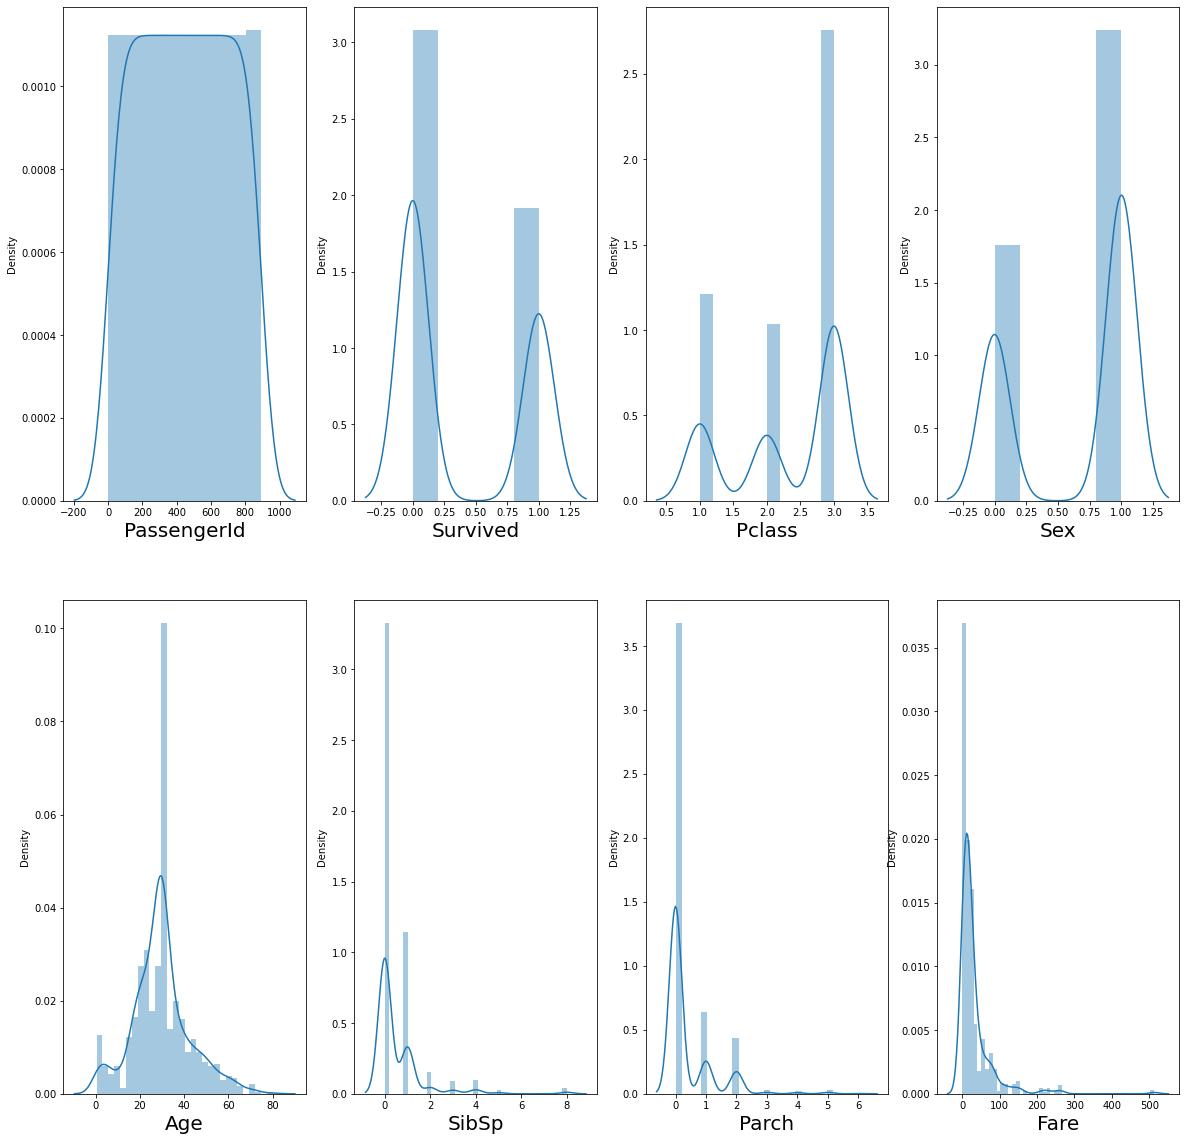

In [30]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in survived:
    if plotno<=8:
        ax=plt.subplot(2,4,plotno)
        sns.distplot(survived[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

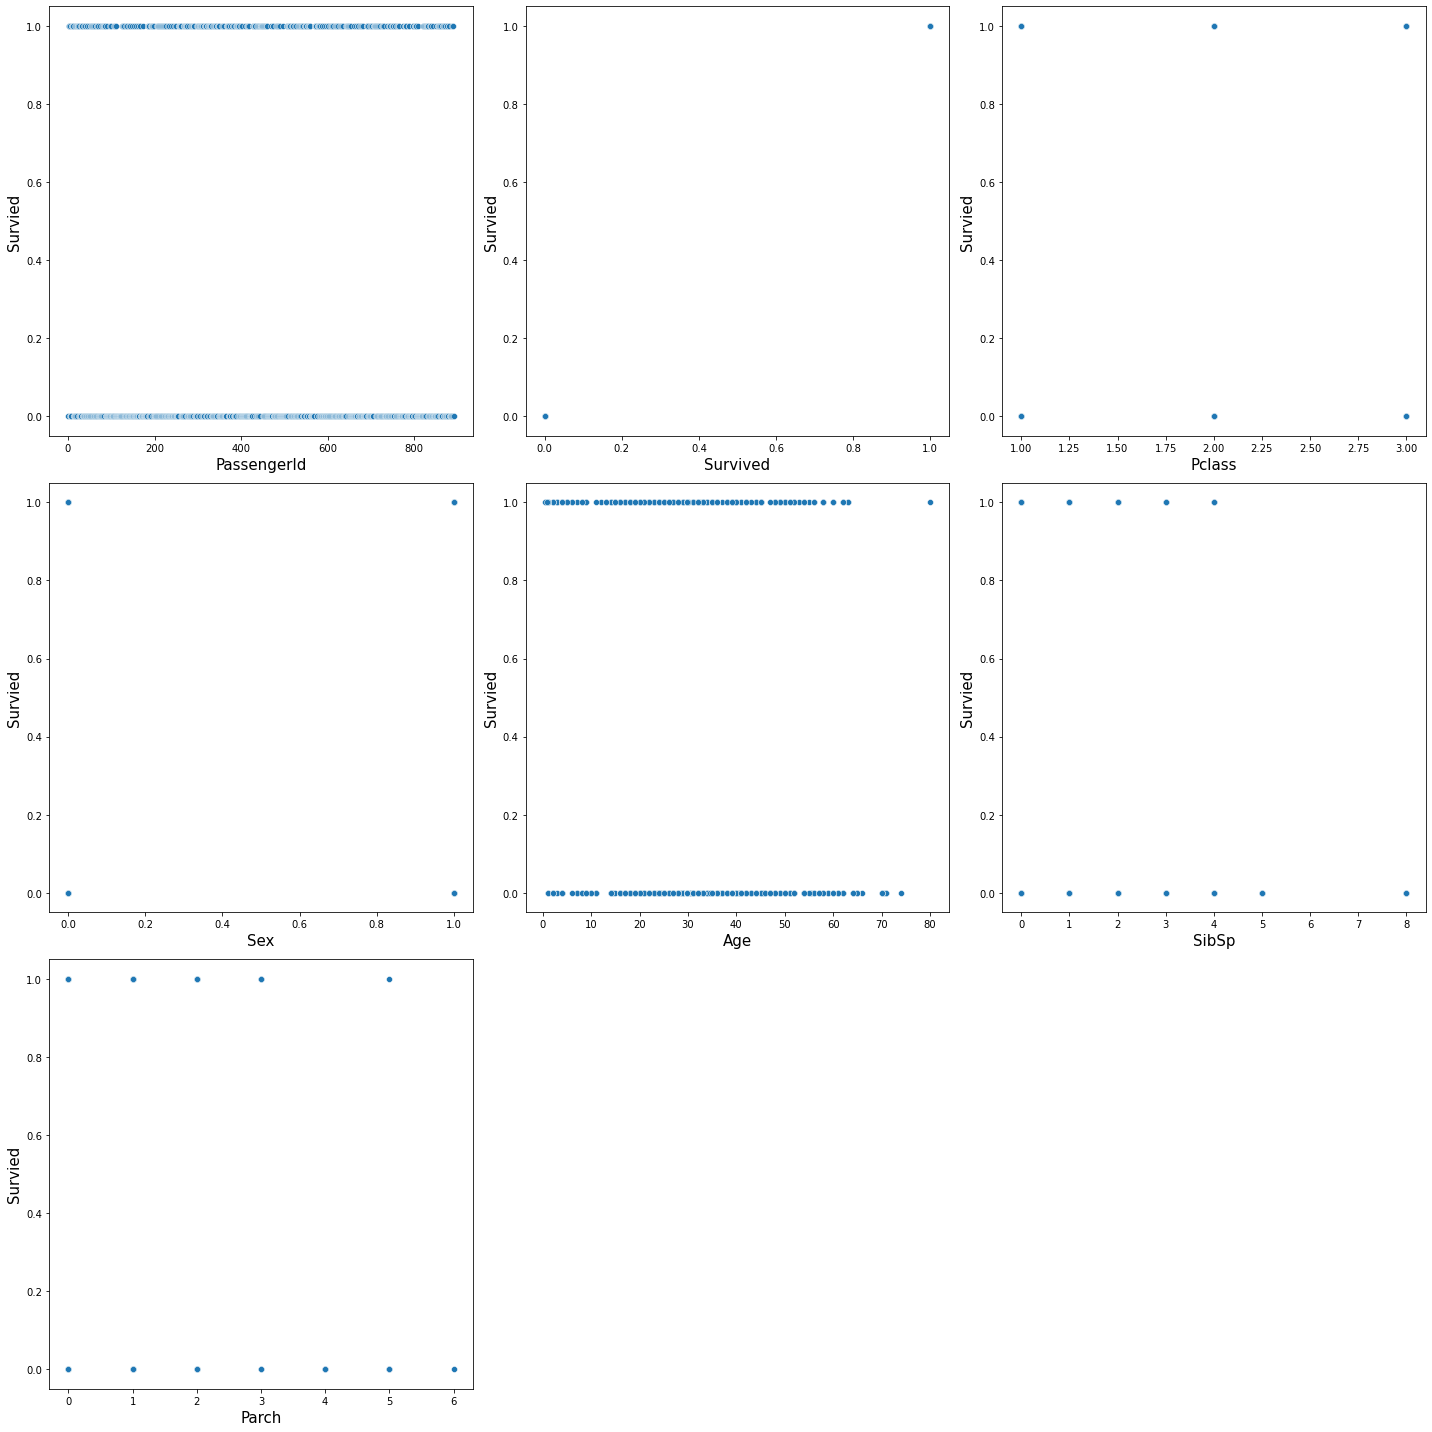

In [31]:
plotno=1
plt.figure(figsize=(20,20))
for col in survived:
    if plotno<8:
        plt.subplot(3,3,plotno)
        sns.scatterplot(survived[col],survived['Survived'])
        plt.xlabel(col,fontsize=15)
        plt.ylabel("Survied",fontsize=15)
    plotno+=1
plt.tight_layout()

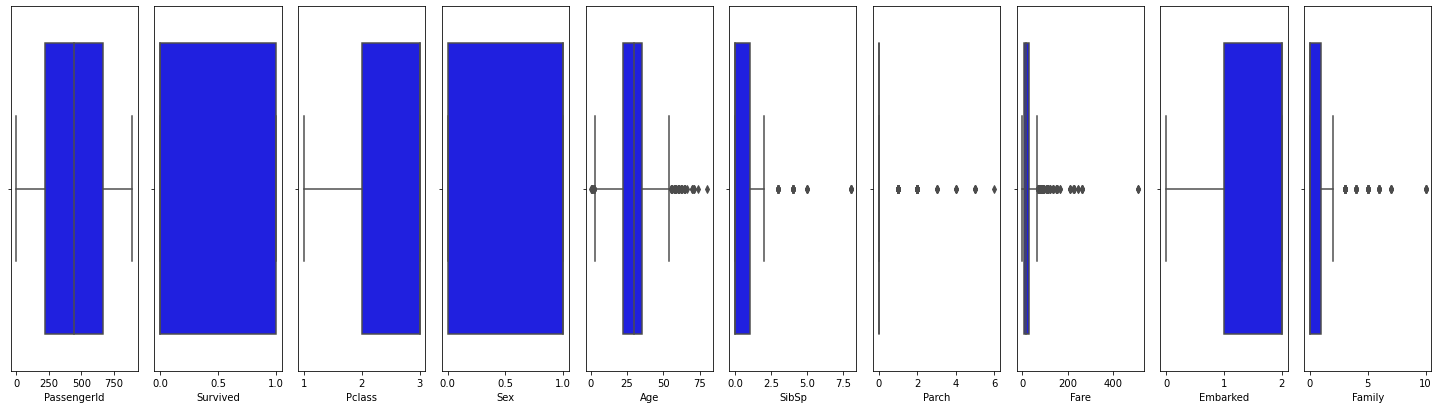

In [32]:
import matplotlib.pyplot as plt
collist=survived.columns.values
ncol=30
nrows=16
plt.figure(figsize=(2*ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(survived[collist[i]],color='blue',orient='v')
    plt.tight_layout()

## Data for model building

In [33]:
X=survived[['Pclass','Age','Family','Fare','Sex']]
y=survived['Survived']

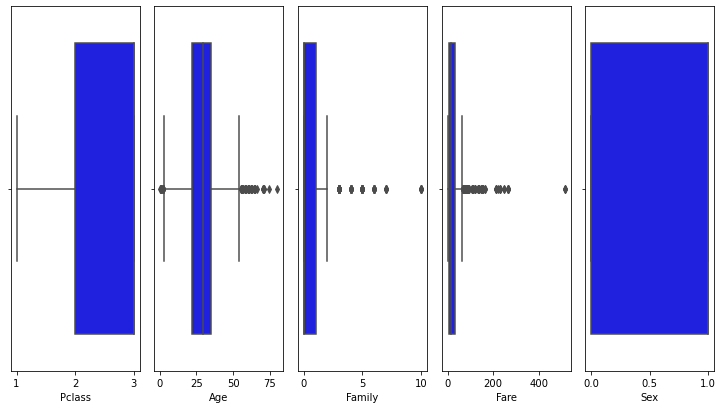

In [34]:
import matplotlib.pyplot as plt
collist=X.columns.values
ncol=30
nrows=16
plt.figure(figsize=(2*ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(X[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In [35]:
X.skew()

Pclass   -0.630548
Age       0.434488
Family    2.727441
Fare      4.787317
Sex      -0.618921
dtype: float64

## Removing Outliers

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(X))
z.shape

(891, 5)

In [37]:
thresold=3
print(np.where(z<3))

(array([  0,   0,   0, ..., 890, 890, 890], dtype=int64), array([0, 1, 2, ..., 2, 3, 4], dtype=int64))


In [38]:
Xxx=survived[(z<3).all(axis=1)]
print(survived.shape)
print(Xxx.shape)

(891, 10)
(839, 10)


In [39]:
# Data Loss
loss_percent=(891-839)/891*100
print(loss_percent)

5.836139169472503


In [40]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [41]:
standardized_data=scaler.transform(X)

In [42]:
print(standardized_data)

[[ 0.82737724 -0.5924806   0.05915988 -0.50244517  0.73769513]
 [-1.56610693  0.63878901  0.05915988  0.78684529 -1.35557354]
 [ 0.82737724 -0.2846632  -0.56097483 -0.48885426 -1.35557354]
 ...
 [ 0.82737724  0.          1.29942929 -0.17626324 -1.35557354]
 [-1.56610693 -0.2846632  -0.56097483 -0.04438104  0.73769513]
 [ 0.82737724  0.17706291 -0.56097483 -0.49237783  0.73769513]]


In [43]:
X=standardized_data
y = survived['Survived']
print(X)
print(y)

[[ 0.82737724 -0.5924806   0.05915988 -0.50244517  0.73769513]
 [-1.56610693  0.63878901  0.05915988  0.78684529 -1.35557354]
 [ 0.82737724 -0.2846632  -0.56097483 -0.48885426 -1.35557354]
 ...
 [ 0.82737724  0.          1.29942929 -0.17626324 -1.35557354]
 [-1.56610693 -0.2846632  -0.56097483 -0.04438104  0.73769513]
 [ 0.82737724  0.17706291 -0.56097483 -0.49237783  0.73769513]]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


## See the outcome in only two variables so we will use binary classification model

In [57]:
lr=LogisticRegression()
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 19)
lr.fit(X_train,y_train)

LogisticRegression()

In [61]:
X_train_prediction = lr.predict(X_train)
training_data_accuracy= accuracy_score(X_train_prediction, y_train)
print("accur",training_data_accuracy)

accur 0.7919161676646707


In [62]:
#accuracy score 0f the test data
X_test_prediction = lr.predict(X_test)
test_data_accuracy= accuracy_score(X_test_prediction,y_test)

print("Accuracy score of the test data is ", test_data_accuracy)

Accuracy score of the test data is  0.8251121076233184


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       137
           1       0.82      0.70      0.75        86

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223



## Cross Validation

In [64]:
pred_lr=lr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,X,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print("accuracy_score is:-",lss*100)
    print("\n")

At cv:- 2
cross validation score is:- 79.01244520582455
accuracy_score is:- 82.51121076233184


At cv:- 3
cross validation score is:- 79.01234567901234
accuracy_score is:- 82.51121076233184


At cv:- 4
cross validation score is:- 79.34997778047106
accuracy_score is:- 82.51121076233184


At cv:- 5
cross validation score is:- 79.23670830456344
accuracy_score is:- 82.51121076233184


At cv:- 6
cross validation score is:- 79.23846665457404
accuracy_score is:- 82.51121076233184


At cv:- 7
cross validation score is:- 79.12682789651294
accuracy_score is:- 82.51121076233184


At cv:- 8
cross validation score is:- 79.68548906048906
accuracy_score is:- 82.51121076233184


At cv:- 9
cross validation score is:- 79.12457912457911
accuracy_score is:- 82.51121076233184




In [65]:
lsscore_selected=cross_val_score(lr,X,y,cv=8).mean()
print("The cv score is:",lsscore_selected,"\nThe accuracy score is:",lss)

The cv score is: 0.7968548906048907 
The accuracy score is: 0.8251121076233184


In [50]:
# AUC-ROC Curve

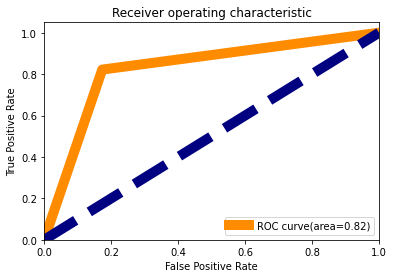

In [69]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresolds=roc_curve(X_test_prediction,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

## Model Saving

In [70]:
import pickle
filename='titanic.pkl'
pickle.dump(lr,open(filename,'wb'))

## Conclusion

In [71]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(X_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
218,0,0
219,0,0
220,0,0
221,1,1
